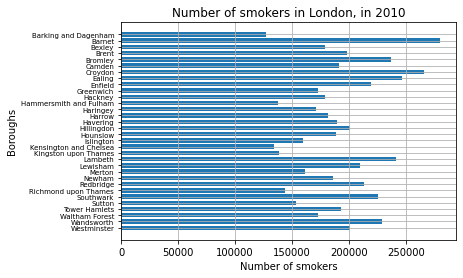

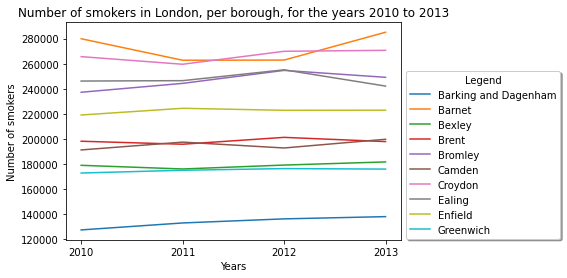

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

indicators = pd.read_csv("smoking-indicators.csv", delimiter=';', thousands=",")

# Drop borough id
indicators.drop('la', inplace=True, axis=1)

# Convert to usable arrays
# For chart 1
boroughs = indicators['Borough name']
smoking_2010_total = indicators['Smoking Status (2010): Total'].to_numpy()

# For chart 2
total = indicators[['Borough name','Smoking Status (2010): Total','Smoking Status (2011): Total','Smoking Status (2012): Total','Smoking Status (2013): Total']]
# Rename the columns
total.columns = ['boroughs', '2010','2011','2012','2013']
# Using all the boroughs makes for an illegible chart
total = total[0:10]


fig, ax = plt.subplots()
ax.barh(boroughs, smoking_2010_total, height=0.7, align='center')
ax.set_ylabel("Boroughs")
ax.set_yticklabels(boroughs, fontsize=7)
ax.invert_yaxis()  
ax.set_xlabel('Number of smokers')
ax.set_title('Number of smokers in London, in 2010')
ax.grid(True)
plt.show()

#Chart2

fig, ax = plt.subplots()
for index, row in total.iterrows():
    ax.plot(row[1:5])
    plt.legend(boroughs,bbox_to_anchor=(1, 0.8), shadow=True, title="Legend", fancybox=True)
ax.set_title('Number of smokers in London, per borough, for the years 2010 to 2013')
ax.set_ylabel("Number of smokers")
ax.set_xlabel("Years")
#plt.legend(row[0], bbox_to_anchor=(1.3, 0.6))
plt.show()

